In [1]:
install.packages("s3")

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [2]:
library("terra")
library("dplyr")
library("sf")
library("sp")
library("stringr")
library("s3")
library("aws.s3")
library("scales")

terra 1.7.29


Attaching package: ‘dplyr’


The following objects are masked from ‘package:terra’:

    intersect, union


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Linking to GEOS 3.11.2, GDAL 3.7.0, PROJ 9.2.0; sf_use_s2() is TRUE


Attaching package: ‘scales’


The following object is masked from ‘package:terra’:

    rescale




In [3]:
iso3 <- "BRA"

f.path <- "s3://maap-ops-workspace/shared/leitoldv/GEDI_global_PA_v2/"
#f.path <- "/projects/my-public-bucket/GEDI_global_PA_v2/"

s3_get_files(c(paste(f.path,"WDPA_countries/shp/",iso3,".shp",sep=""),
              paste(f.path,"WDPA_countries/shp/",iso3,".shx",sep=""),
              paste(f.path,"WDPA_countries/shp/",iso3,".prj",sep=""),
              paste(f.path,"WDPA_countries/shp/",iso3,".dbf",sep="")),confirm = FALSE)
admBRA <- st_read(s3_get(paste(f.path,"WDPA_countries/shp/",iso3,".shp",sep="")))
admBRA <- vect(admBRA)

allPAsBRA <- readRDS(s3_get(paste(f.path,"WDPA_shapefiles/WDPA_polygons/",iso3,"_PA_poly.rds",sep="")))
#write.csv(allPAsBRA@data, file=paste(f.path,"WDPA_extract/allPAs_BRA_attributes.csv",sep=""))
allPAsBRA_df <- read.csv(s3_get(paste(f.path,"WDPA_extract/allPAs_BRA_attributes.csv",sep="")))

ℹ all files already exist

ℹ s3://maap-ops-workspace/shared/leitoldv/GEDI_global_PA_v2/WDPA_countries/shp/BRA.shp already exists at /projects/.local/share/R/s3/maap-ops-workspace/shared/leitoldv/GEDI_global_PA_v2/WDPA_countries/shp/BRA.shp



Reading layer `BRA' from data source 
  `/projects/.local/share/R/s3/maap-ops-workspace/shared/leitoldv/GEDI_global_PA_v2/WDPA_countries/shp/BRA.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 1 feature and 94 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: -74.01847 ymin: -33.74228 xmax: -28.87706 ymax: 5.267225
Geodetic CRS:  WGS 84


ℹ s3://maap-ops-workspace/shared/leitoldv/GEDI_global_PA_v2/WDPA_shapefiles/WDPA_polygons/BRA_PA_poly.rds already exists at /projects/.local/share/R/s3/maap-ops-workspace/shared/leitoldv/GEDI_global_PA_v2/WDPA_shapefiles/WDPA_polygons/BRA_PA_poly.rds

ℹ s3://maap-ops-workspace/shared/leitoldv/GEDI_global_PA_v2/WDPA_extract/allPAs_BRA_attributes.csv already exists at /projects/.local/share/R/s3/maap-ops-workspace/shared/leitoldv/GEDI_global_PA_v2/WDPA_extract/allPAs_BRA_attributes.csv



In [4]:
unique(allPAsBRA_df$IUCN_CAT)
unique(allPAsBRA_df$DESIG_ENG)

[1] "Ia"             "II"             "V"              "IV"            
[5] "Not Reported"   "VI"             "Not Applicable" "III"           
[9] "Ib"

[1] "Biological Reserve"                              
 [2] "Park"                                            
 [3] "Ecological Station"                              
 [4] "Environmental Protection Area"                   
 [5] "Area of Relevant Ecological Interest"            
 [6] "Indigenous Area"                                 
 [7] "Forest"                                          
 [8] "World Heritage Site (natural or mixed)"          
 [9] "Natural Heritage Private Reserve"                
[10] "Sustainable Development Reserve"                 
[11] "Extractive Reserve"                              
[12] "Indigenous Reserve"                              
[13] "Ramsar Site, Wetland of International Importance"
[14] "Natural Monument"                                
[15] "Wildlife Refuge"

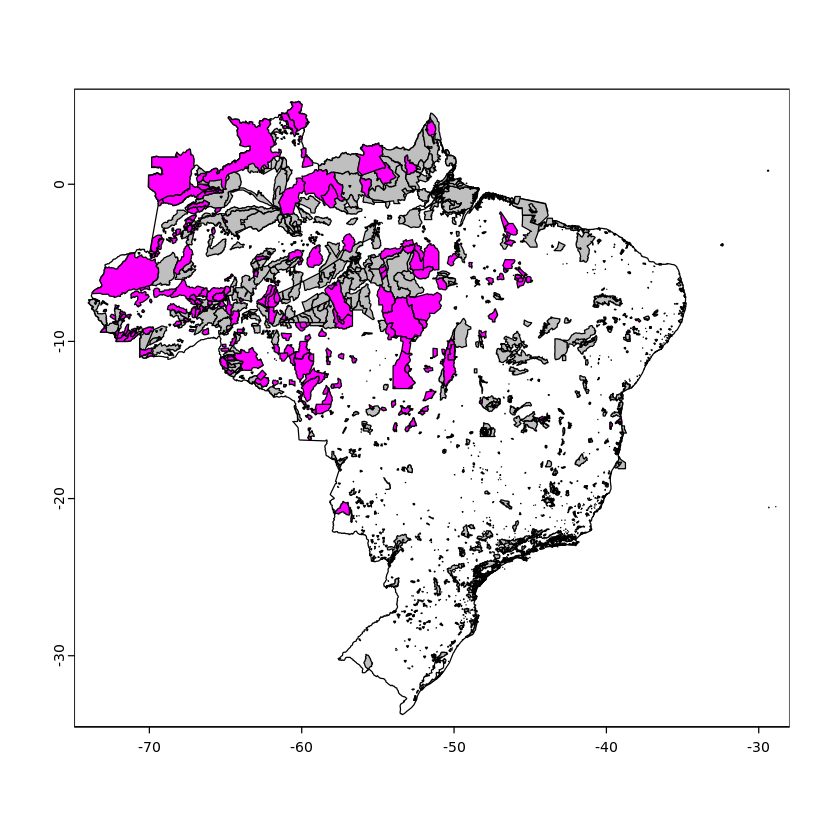

In [5]:
plot(admBRA)
plot(allPAsBRA[allPAsBRA$DESIG_ENG!="Indigenous Area",], col="gray75", add=T)
plot(allPAsBRA[allPAsBRA$DESIG_ENG=="Indigenous Area",], col="magenta", add=T)
plot(allPAsBRA[allPAsBRA$DESIG_ENG=="Indigenous Reserve",], col="magenta", add=T)

In [6]:
iso3 <- "BaE"
#adm <- vect(paste(f.path,"WDPA_countries/shp/",iso3,".shp",sep=""))
s3_get_files(c(paste(f.path,"WDPA_countries/shp/",iso3,".shp",sep=""),
              paste(f.path,"WDPA_countries/shp/",iso3,".shx",sep=""),
              paste(f.path,"WDPA_countries/shp/",iso3,".prj",sep=""),
              paste(f.path,"WDPA_countries/shp/",iso3,".dbf",sep="")),confirm = FALSE)
adm <- st_read(s3_get(paste(f.path,"WDPA_countries/shp/",iso3,".shp",sep="")))
admBaE <- vect(adm)

ℹ all files already exist

ℹ s3://maap-ops-workspace/shared/leitoldv/GEDI_global_PA_v2/WDPA_countries/shp/BaE.shp already exists at /projects/.local/share/R/s3/maap-ops-workspace/shared/leitoldv/GEDI_global_PA_v2/WDPA_countries/shp/BaE.shp



Reading layer `BaE' from data source 
  `/projects/.local/share/R/s3/maap-ops-workspace/shared/leitoldv/GEDI_global_PA_v2/WDPA_countries/shp/BaE.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 1 feature and 7 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: -61.6113 ymin: -16.30581 xmax: -43.61394 ymax: 4.430496
Geodetic CRS:  WGS 84


In [7]:
iso3 <- "BaW"
#adm <- vect(paste(f.path,"WDPA_countries/shp/",iso3,".shp",sep=""))
s3_get_files(c(paste(f.path,"WDPA_countries/shp/",iso3,".shp",sep=""),
              paste(f.path,"WDPA_countries/shp/",iso3,".shx",sep=""),
              paste(f.path,"WDPA_countries/shp/",iso3,".prj",sep=""),
              paste(f.path,"WDPA_countries/shp/",iso3,".dbf",sep="")),confirm = FALSE)
adm <- st_read(s3_get(paste(f.path,"WDPA_countries/shp/",iso3,".shp",sep="")))
admBaW <- vect(adm)

ℹ all files already exist

ℹ s3://maap-ops-workspace/shared/leitoldv/GEDI_global_PA_v2/WDPA_countries/shp/BaW.shp already exists at /projects/.local/share/R/s3/maap-ops-workspace/shared/leitoldv/GEDI_global_PA_v2/WDPA_countries/shp/BaW.shp



Reading layer `BaW' from data source 
  `/projects/.local/share/R/s3/maap-ops-workspace/shared/leitoldv/GEDI_global_PA_v2/WDPA_countries/shp/BaW.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 1 feature and 7 fields
Geometry type: POLYGON
Dimension:     XY
Bounding box:  xmin: -73.98043 ymin: -13.66284 xmax: -56.31193 ymax: 5.241181
Geodetic CRS:  WGS 84


In [8]:
iso3 <- "Bca"
#adm <- vect(paste(f.path,"WDPA_countries/shp/",iso3,".shp",sep=""))
s3_get_files(c(paste(f.path,"WDPA_countries/shp/",iso3,".shp",sep=""),
              paste(f.path,"WDPA_countries/shp/",iso3,".shx",sep=""),
              paste(f.path,"WDPA_countries/shp/",iso3,".prj",sep=""),
              paste(f.path,"WDPA_countries/shp/",iso3,".dbf",sep="")),confirm = FALSE)
adm <- st_read(s3_get(paste(f.path,"WDPA_countries/shp/",iso3,".shp",sep="")))
admBca <- vect(adm)

ℹ all files already exist

ℹ s3://maap-ops-workspace/shared/leitoldv/GEDI_global_PA_v2/WDPA_countries/shp/Bca.shp already exists at /projects/.local/share/R/s3/maap-ops-workspace/shared/leitoldv/GEDI_global_PA_v2/WDPA_countries/shp/Bca.shp



Reading layer `Bca' from data source 
  `/projects/.local/share/R/s3/maap-ops-workspace/shared/leitoldv/GEDI_global_PA_v2/WDPA_countries/shp/Bca.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 1 feature and 7 fields
Geometry type: POLYGON
Dimension:     XY
Bounding box:  xmin: -44.50887 ymin: -16.08888 xmax: -35.17211 ymax: -2.808682
Geodetic CRS:  WGS 84


In [9]:
iso3 <- "Bce"
#adm <- vect(paste(f.path,"WDPA_countries/shp/",iso3,".shp",sep=""))
s3_get_files(c(paste(f.path,"WDPA_countries/shp/",iso3,".shp",sep=""),
              paste(f.path,"WDPA_countries/shp/",iso3,".shx",sep=""),
              paste(f.path,"WDPA_countries/shp/",iso3,".prj",sep=""),
              paste(f.path,"WDPA_countries/shp/",iso3,".dbf",sep="")),confirm = FALSE)
adm <- st_read(s3_get(paste(f.path,"WDPA_countries/shp/",iso3,".shp",sep="")))
admBce <- vect(adm)

ℹ all files already exist

ℹ s3://maap-ops-workspace/shared/leitoldv/GEDI_global_PA_v2/WDPA_countries/shp/Bce.shp already exists at /projects/.local/share/R/s3/maap-ops-workspace/shared/leitoldv/GEDI_global_PA_v2/WDPA_countries/shp/Bce.shp



Reading layer `Bce' from data source 
  `/projects/.local/share/R/s3/maap-ops-workspace/shared/leitoldv/GEDI_global_PA_v2/WDPA_countries/shp/Bce.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 1 feature and 7 fields
Geometry type: POLYGON
Dimension:     XY
Bounding box:  xmin: -60.10991 ymin: -24.68502 xmax: -41.5222 ymax: -2.340799
Geodetic CRS:  WGS 84


In [10]:
iso3 <- "Bma"
#adm <- vect(paste(f.path,"WDPA_countries/shp/",iso3,".shp",sep=""))
s3_get_files(c(paste(f.path,"WDPA_countries/shp/",iso3,".shp",sep=""),
              paste(f.path,"WDPA_countries/shp/",iso3,".shx",sep=""),
              paste(f.path,"WDPA_countries/shp/",iso3,".prj",sep=""),
              paste(f.path,"WDPA_countries/shp/",iso3,".dbf",sep="")),confirm = FALSE)
adm <- st_read(s3_get(paste(f.path,"WDPA_countries/shp/",iso3,".shp",sep="")))
admBma <- vect(adm)

ℹ all files already exist

ℹ s3://maap-ops-workspace/shared/leitoldv/GEDI_global_PA_v2/WDPA_countries/shp/Bma.shp already exists at /projects/.local/share/R/s3/maap-ops-workspace/shared/leitoldv/GEDI_global_PA_v2/WDPA_countries/shp/Bma.shp



Reading layer `Bma' from data source 
  `/projects/.local/share/R/s3/maap-ops-workspace/shared/leitoldv/GEDI_global_PA_v2/WDPA_countries/shp/Bma.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 1 feature and 7 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: -55.66354 ymin: -29.95173 xmax: -34.82325 ymax: -5.15406
Geodetic CRS:  WGS 84


In [11]:
iso3 <- "Bpp"
#adm <- vect(paste(f.path,"WDPA_countries/shp/",iso3,".shp",sep=""))
s3_get_files(c(paste(f.path,"WDPA_countries/shp/",iso3,".shp",sep=""),
              paste(f.path,"WDPA_countries/shp/",iso3,".shx",sep=""),
              paste(f.path,"WDPA_countries/shp/",iso3,".prj",sep=""),
              paste(f.path,"WDPA_countries/shp/",iso3,".dbf",sep="")),confirm = FALSE)
adm <- st_read(s3_get(paste(f.path,"WDPA_countries/shp/",iso3,".shp",sep="")))
admBpp <- vect(adm)

ℹ all files already exist

ℹ s3://maap-ops-workspace/shared/leitoldv/GEDI_global_PA_v2/WDPA_countries/shp/Bpp.shp already exists at /projects/.local/share/R/s3/maap-ops-workspace/shared/leitoldv/GEDI_global_PA_v2/WDPA_countries/shp/Bpp.shp



Reading layer `Bpp' from data source 
  `/projects/.local/share/R/s3/maap-ops-workspace/shared/leitoldv/GEDI_global_PA_v2/WDPA_countries/shp/Bpp.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 1 feature and 7 fields
Geometry type: POLYGON
Dimension:     XY
Bounding box:  xmin: -57.64434 ymin: -33.75473 xmax: -49.7159 ymax: -28.08345
Geodetic CRS:  WGS 84


In [12]:
iso3 <- "Bpt"
#adm <- vect(paste(f.path,"WDPA_countries/shp/",iso3,".shp",sep=""))
s3_get_files(c(paste(f.path,"WDPA_countries/shp/",iso3,".shp",sep=""),
              paste(f.path,"WDPA_countries/shp/",iso3,".shx",sep=""),
              paste(f.path,"WDPA_countries/shp/",iso3,".prj",sep=""),
              paste(f.path,"WDPA_countries/shp/",iso3,".dbf",sep="")),confirm = FALSE)
adm <- st_read(s3_get(paste(f.path,"WDPA_countries/shp/",iso3,".shp",sep="")))
admBpt <- vect(adm)

ℹ all files already exist

ℹ s3://maap-ops-workspace/shared/leitoldv/GEDI_global_PA_v2/WDPA_countries/shp/Bpt.shp already exists at /projects/.local/share/R/s3/maap-ops-workspace/shared/leitoldv/GEDI_global_PA_v2/WDPA_countries/shp/Bpt.shp



Reading layer `Bpt' from data source 
  `/projects/.local/share/R/s3/maap-ops-workspace/shared/leitoldv/GEDI_global_PA_v2/WDPA_countries/shp/Bpt.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 1 feature and 7 fields
Geometry type: POLYGON
Dimension:     XY
Bounding box:  xmin: -59.18886 ymin: -22.11834 xmax: -54.92231 ymax: -15.52386
Geodetic CRS:  WGS 84


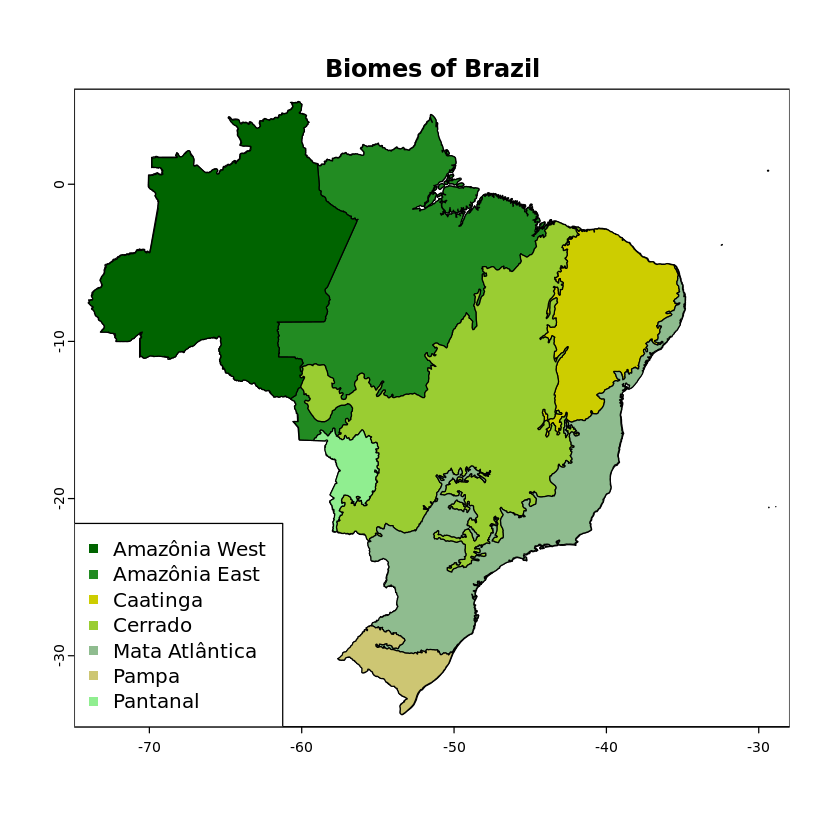

In [13]:
plot(admBRA, main="Biomes of Brazil")

plot(admBaE, col="forestgreen", add=T)
plot(admBaW, col="darkgreen", add=T)
plot(admBca, col="yellow3", add=T)
plot(admBce, col="yellowgreen", add=T)
plot(admBma, col="darkseagreen", add=T)
plot(admBpp, col="khaki3", add=T)
plot(admBpt, col="lightgreen", add=T)

#plot(allPAsBRA[allPAsBRA$DESIG_ENG!="Indigenous Area",], col="gray75", add=T)
#plot(allPAsBRA[allPAsBRA$DESIG_ENG=="Indigenous Area",], col="magenta", add=T)
#plot(allPAsBRA[allPAsBRA$DESIG_ENG=="Indigenous Reserve",], col="magenta", add=T)

legend=c("BaW","BaE","Bca","Bce","Bma","Bpp","Bpt")
legend2=c("Amazônia West","Amazônia East","Caatinga","Cerrado","Mata Atlântica","Pampa","Pantanal")

add_legend("bottomleft", legend=legend2, pch=15,
           col=c("darkgreen","forestgreen","yellow3","yellowgreen","darkseagreen","khaki3","lightgreen"))

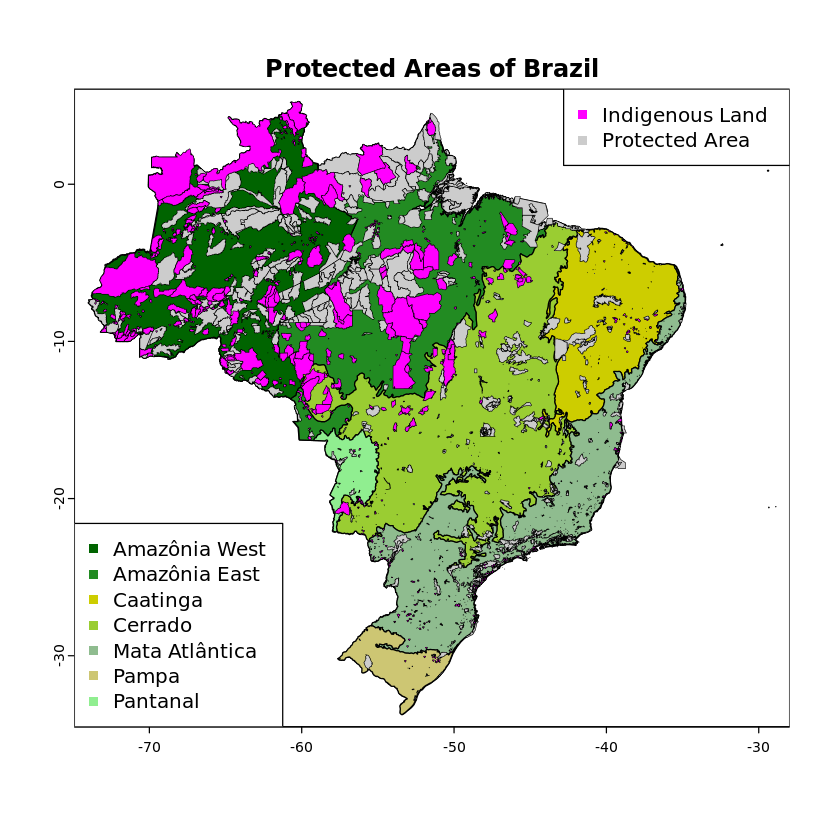

In [14]:
plot(admBRA, main="Protected Areas of Brazil")

plot(admBaE, col="forestgreen", add=T)
plot(admBaW, col="darkgreen", add=T)
plot(admBca, col="yellow3", add=T)
plot(admBce, col="yellowgreen", add=T)
plot(admBma, col="darkseagreen", add=T)
plot(admBpp, col="khaki3", add=T)
plot(admBpt, col="lightgreen", add=T)

plot(allPAsBRA[allPAsBRA$DESIG_ENG!="Indigenous Area",], col="gray80", lwd=0.5, add=T)
plot(allPAsBRA[allPAsBRA$DESIG_ENG=="Indigenous Area",], col="magenta", lwd=0.5, add=T)
plot(allPAsBRA[allPAsBRA$DESIG_ENG=="Indigenous Reserve",], col="magenta", lwd=0.5, add=T)

legend=c("BaW","BaE","Bca","Bce","Bma","Bpp","Bpt")
legend2=c("Amazônia West","Amazônia East","Caatinga","Cerrado","Mata Atlântica","Pampa","Pantanal")

add_legend("bottomleft", legend=legend2, pch=15,
           col=c("darkgreen","forestgreen","yellow3","yellowgreen","darkseagreen","khaki3","lightgreen"))

add_legend("topright", legend=c("Indigenous Land","Protected Area"), pch=15,
           col=c("magenta","gray80"))

In [15]:
print(nrow(allPAsBRA_df))
print(nrow(allPAsBRA_df[allPAsBRA_df$DESIG_ENG!="Indigenous Area",]))
print(nrow(allPAsBRA_df[allPAsBRA_df$DESIG_ENG=="Indigenous Area",]))
print(nrow(allPAsBRA_df[allPAsBRA_df$DESIG_ENG=="Indigenous Reserve",]))

[1] 2521
[1] 1821
[1] 700
[1] 19


In [16]:
#f.path <- "/projects/my-public-bucket/GEDI_global_PA_v2/"
#f.path <- "s3://maap-ops-workspace/shared/leitoldv/GEDI_global_PA_v2/"
#gediwk <- 24
#pa_stats <- list()
#iso3s <- c("BaW","BaE","Bca","Bce","Bma","Bpp","Bpt")
#
#for(i in 1:length(iso3s)){
#    iso3 <- iso3s[i]
#    pa_stats[[i]] <- read.csv(s3_get(paste(f.path,"WDPA_extract/pa_stats/",iso3,"_pa_stats_summary_wk",gediwk,".csv", sep="")))
#    pa_stats[[i]]$bbiom <- rep(iso3,nrow(pa_stats[[i]]))
#    print(nrow(pa_stats[[i]]))
#}
#length(pa_stats)
#pa_stats_BRA <- dplyr::bind_rows(pa_stats)

f.path <- "s3://maap-ops-workspace/shared/leitoldv/GEDI_global_PA_v2/"
gediwk <- 24
iso3 <- "BRA"
pa_stats_BRA <- read.csv(s3_get(paste(f.path,"WDPA_extract/pa_stats/",iso3,"_pa_stats_summary_wk",gediwk,".csv", sep="")))
dim(pa_stats_BRA)
colnames(pa_stats_BRA)

ℹ s3://maap-ops-workspace/shared/leitoldv/GEDI_global_PA_v2/WDPA_extract/pa_stats/BRA_pa_stats_summary_wk24.csv already exists at /projects/.local/share/R/s3/maap-ops-workspace/shared/leitoldv/GEDI_global_PA_v2/WDPA_extract/pa_stats/BRA_pa_stats_summary_wk24.csv



[1] 1626   20

[1] "pa_id"       "count_0"     "count_1"     "meanrh98_0"  "meanrh98_1" 
 [6] "sdrh98_0"    "sdrh98_1"    "meanagbd_0"  "meanagbd_1"  "sdagbd_0"   
[11] "sdagbd_1"    "wwfbiom_0"   "wwfbiom_1"   "wwfecoreg_0" "wwfecoreg_1"
[16] "REGION_0"    "REGION_1"    "PFT_0"       "PFT_1"       "iso3"

In [17]:
length(unique(pa_stats_BRA$pa_id))

[1] 1592

In [18]:
length(unique(pa_stats_BRA %>% filter(duplicated(pa_id)))$pa_id)

[1] 33

In [19]:
duplicated_paid <- unique(pa_stats_BRA %>% filter(duplicated(pa_id)))$pa_id
duplicated_paid

[1]  31752  33919  33964  34040 351782 478419  81058  81058  81058  81058
[11]  81058  81058  81058  81058  81058  81058  81058  81058  81058  81058
[21]  81058  81058  81058  81058  81058  81058  81058  81058  81058  81058
[31]  81058  81058  81058

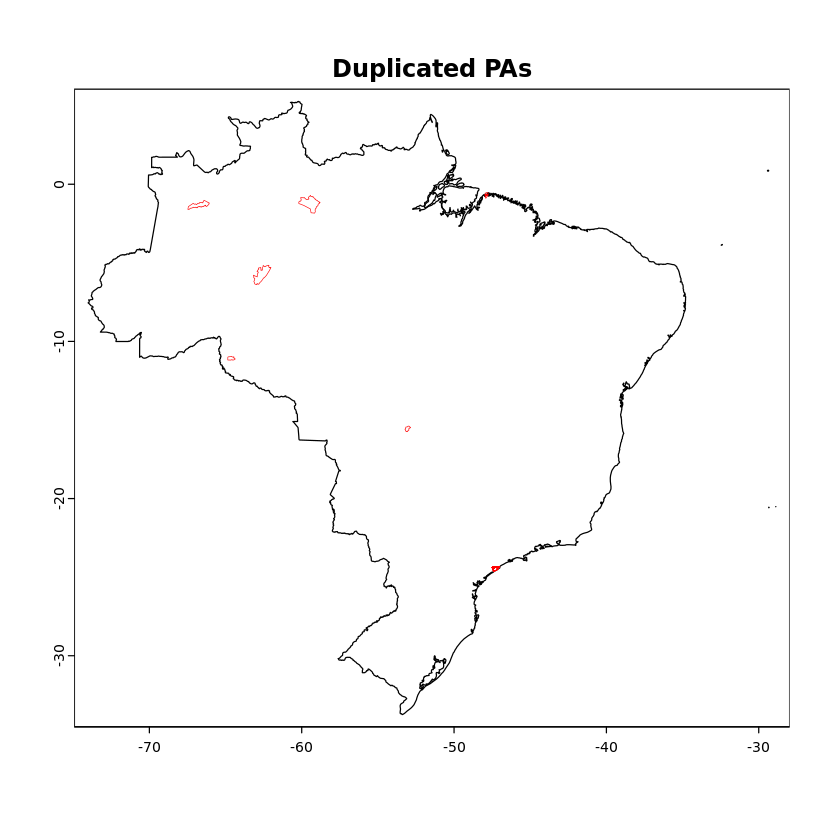

In [24]:
plot(admBRA, main="Duplicated PAs")

for(i in 1:length(duplicated_paid)){
    plot(allPAsBRA[allPAsBRA$WDPAID==duplicated_paid[i],], lwd=0.5, border="red", add=T)
}

In [220]:
pa_stats_BRA$rh98_difA <- pa_stats_BRA$meanrh98_1 - pa_stats_BRA$meanrh98_0
pa_stats_BRA$rh98_difP <- 100*(pa_stats_BRA$meanrh98_1 - pa_stats_BRA$meanrh98_0)/pa_stats_BRA$meanrh98_0

pa_stats_BRA$agbd_difA <- pa_stats_BRA$meanagbd_1 - pa_stats_BRA$meanagbd_0
pa_stats_BRA$agbd_difP <- 100*(pa_stats_BRA$meanagbd_1 - pa_stats_BRA$meanagbd_0)/pa_stats_BRA$meanagbd_0

In [221]:
allPAsBRA_df <- read.csv(s3_get(paste(f.path,"WDPA_extract/allPAs_BRA_attributes.csv",sep="")))
colnames(allPAsBRA_df)

ℹ s3://maap-ops-workspace/shared/leitoldv/GEDI_global_PA_v2/WDPA_extract/allPAs_BRA_attributes.csv already exists at /projects/.local/share/R/s3/maap-ops-workspace/shared/leitoldv/GEDI_global_PA_v2/WDPA_extract/allPAs_BRA_attributes.csv



[1] "X"          "WDPAID"     "WDPA_PID"   "PA_DEF"     "NAME"      
 [6] "ORIG_NAME"  "DESIG"      "DESIG_ENG"  "DESIG_TYPE" "IUCN_CAT"  
[11] "INT_CRIT"   "MARINE"     "REP_M_AREA" "GIS_M_AREA" "REP_AREA"  
[16] "GIS_AREA"   "NO_TAKE"    "NO_TK_AREA" "STATUS"     "STATUS_YR" 
[21] "GOV_TYPE"   "OWN_TYPE"   "MANG_AUTH"  "MANG_PLAN"  "VERIF"     
[26] "METADATAID" "SUB_LOC"    "PARENT_ISO" "ISO3"

In [222]:
nrow(allPAsBRA_df)
nrow(pa_stats_BRA)

[1] 2521

[1] 1714

In [223]:
pa_stats_BRA$WDPAID <- pa_stats_BRA$pa_id

In [224]:
pa_stats_BRA_merg <- merge(pa_stats_BRA, allPAsBRA_df, by="WDPAID", all.x=TRUE)

In [225]:
dim(pa_stats_BRA_merg)
colnames(pa_stats_BRA_merg)

[1] 1714   54

[1] "WDPAID"      "pa_id"       "count_0"     "count_1"     "meanrh98_0" 
 [6] "meanrh98_1"  "sdrh98_0"    "sdrh98_1"    "meanagbd_0"  "meanagbd_1" 
[11] "sdagbd_0"    "sdagbd_1"    "wwfbiom_0"   "wwfbiom_1"   "wwfecoreg_0"
[16] "wwfecoreg_1" "REGION_0"    "REGION_1"    "PFT_0"       "PFT_1"      
[21] "iso3"        "bbiom"       "rh98_difA"   "rh98_difP"   "agbd_difA"  
[26] "agbd_difP"   "X"           "WDPA_PID"    "PA_DEF"      "NAME"       
[31] "ORIG_NAME"   "DESIG"       "DESIG_ENG"   "DESIG_TYPE"  "IUCN_CAT"   
[36] "INT_CRIT"    "MARINE"      "REP_M_AREA"  "GIS_M_AREA"  "REP_AREA"   
[41] "GIS_AREA"    "NO_TAKE"     "NO_TK_AREA"  "STATUS"      "STATUS_YR"  
[46] "GOV_TYPE"    "OWN_TYPE"    "MANG_AUTH"   "MANG_PLAN"   "VERIF"      
[51] "METADATAID"  "SUB_LOC"     "PARENT_ISO"  "ISO3"

In [136]:
breaks_rh98 <- seq(-20,20,1)
ylim_rh98 <- c(0,0.2)
xlab_rh98 <- "abs diff rh98 (meters)"

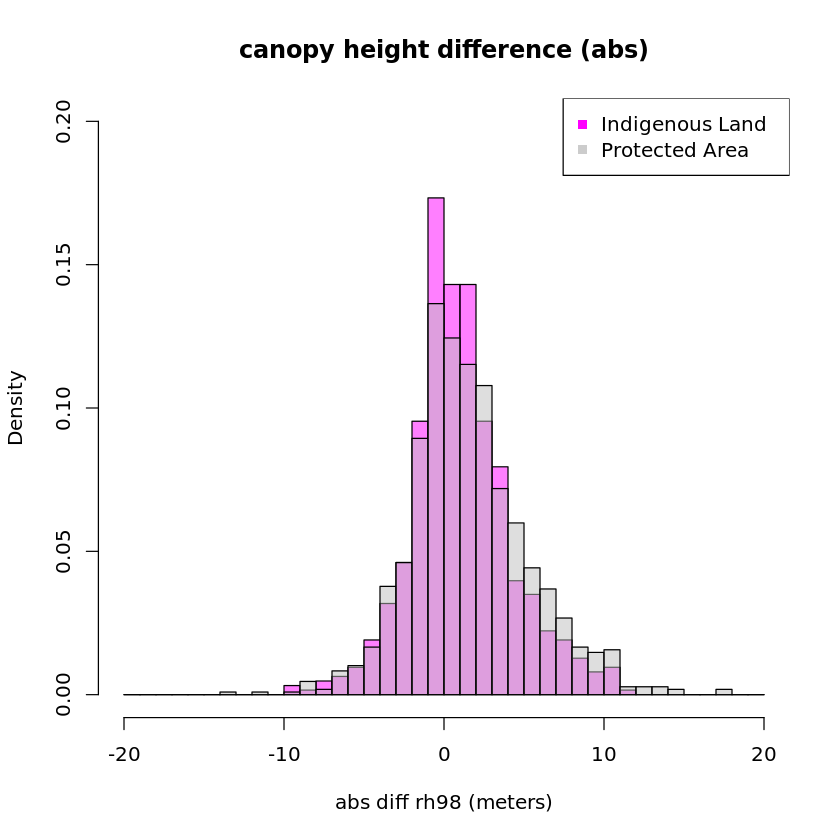

In [147]:
hist(pa_stats_BRA_merg[pa_stats_BRA_merg$DESIG_ENG=="Indigenous Area", "rh98_difA"],
     breaks=breaks_rh98, ylim=ylim_rh98, xlab=xlab_rh98,
     col=alpha("magenta",0.5), freq=F,
    main="canopy height difference (abs)")

hist(pa_stats_BRA_merg[pa_stats_BRA_merg$DESIG_ENG!="Indigenous Area", "rh98_difA"],
     freq=F, add=T, breaks=breaks_rh98,
     col=alpha("grey",0.5))

legend("topright", legend=c("Indigenous Land","Protected Area"), pch=15,
           col=c("magenta","gray80"))

In [162]:
breaks_rh98 <- seq(-100,600,10)
ylim_rh98 <- c(0,0.025)
xlab_rh98 <- "% diff rh98"

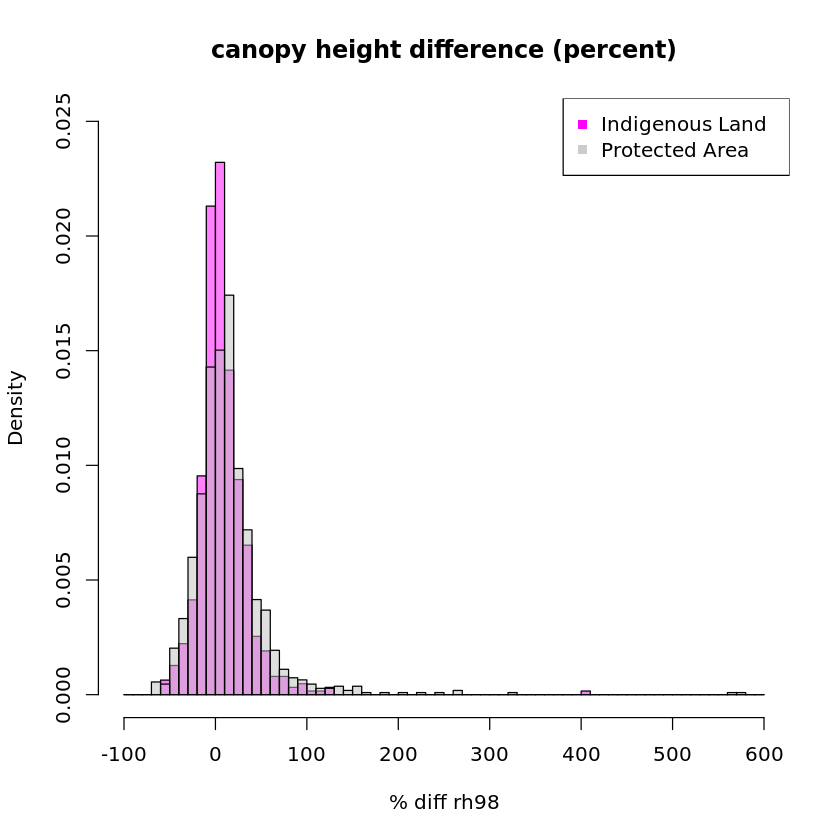

In [163]:
hist(pa_stats_BRA_merg[pa_stats_BRA_merg$DESIG_ENG=="Indigenous Area", "rh98_difP"],
     breaks=breaks_rh98, ylim=ylim_rh98, xlab=xlab_rh98,
     col=alpha("magenta",0.5), freq=F,
    main="canopy height difference (percent)")

hist(pa_stats_BRA_merg[pa_stats_BRA_merg$DESIG_ENG!="Indigenous Area", "rh98_difP"],
     freq=F, add=T, breaks=breaks_rh98,
     col=alpha("grey",0.5))

legend("topright", legend=c("Indigenous Land","Protected Area"), pch=15,
           col=c("magenta","gray80"))

In [176]:
breaks_agbd <- seq(-200,200,10)
ylim_agbd <- c(0,0.025)
xlab_agbd <- "abs diff agbd (Mg/ha)"

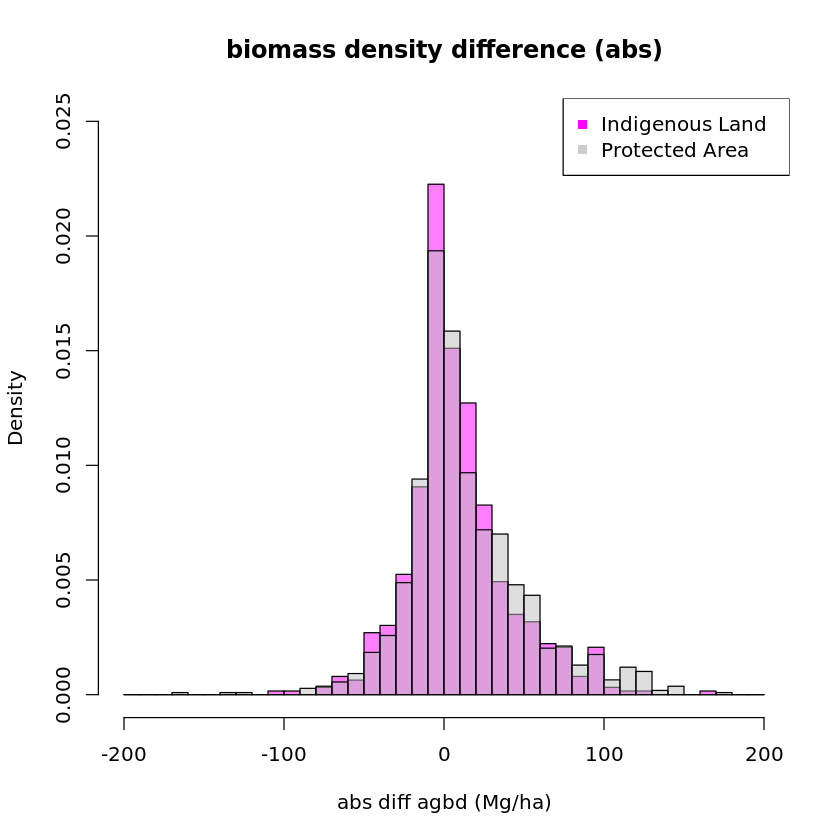

In [177]:
hist(pa_stats_BRA_merg[pa_stats_BRA_merg$DESIG_ENG=="Indigenous Area", "agbd_difA"],
     breaks=breaks_agbd, ylim=ylim_agbd, xlab=xlab_agbd,
     col=alpha("magenta",0.5), freq=F,
    main="biomass density difference (abs)")

hist(pa_stats_BRA_merg[pa_stats_BRA_merg$DESIG_ENG!="Indigenous Area", "agbd_difA"],
     freq=F, add=T,
     breaks=breaks_agbd,
     col=alpha("grey",0.5))

legend("topright", legend=c("Indigenous Land","Protected Area"), pch=15,
           col=c("magenta","gray80"))

In [208]:
breaks_agbd <- seq(-100,7500,100)
ylim_agbd <- c(0,0.005)
xlab_agbd <- "% diff agbd"

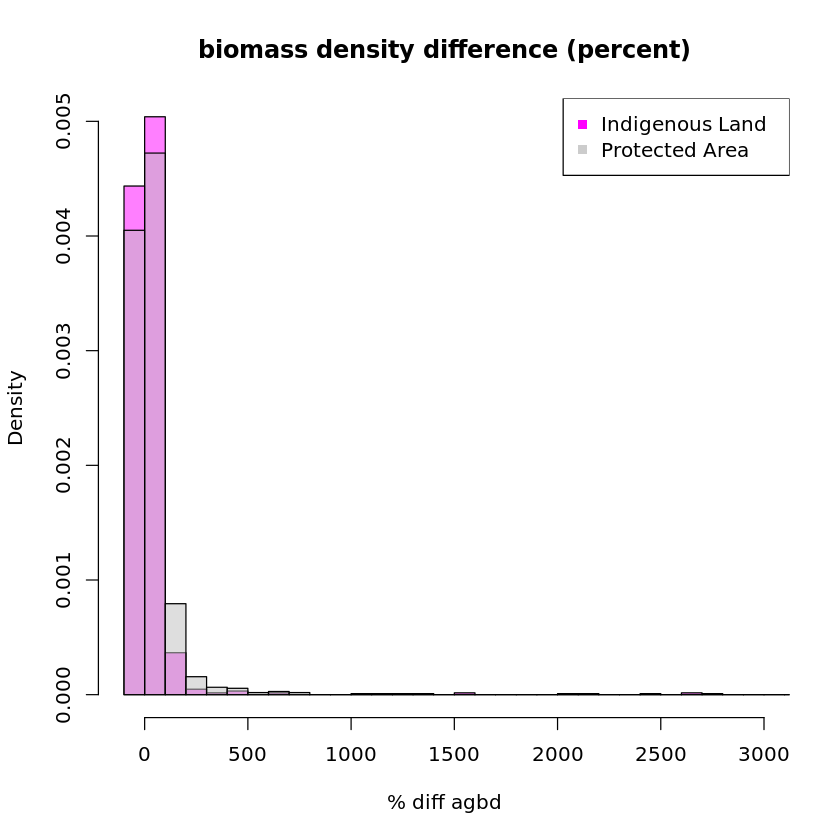

In [211]:
hist(pa_stats_BRA_merg[pa_stats_BRA_merg$DESIG_ENG=="Indigenous Area", "agbd_difP"],
     breaks=breaks_agbd, ylim=ylim_agbd, xlab=xlab_agbd,
     col=alpha("magenta",0.5), freq=F,
     xlim=c(-100,3000),
    main="biomass density difference (percent)")

hist(pa_stats_BRA_merg[pa_stats_BRA_merg$DESIG_ENG!="Indigenous Area", "agbd_difP"],
     freq=F, add=T,
     breaks=breaks_agbd,
     col=alpha("grey",0.5))

legend("topright", legend=c("Indigenous Land","Protected Area"), pch=15,
           col=c("magenta","gray80"))

In [226]:
biome_summary <- matrix(0, nrow=7, ncol=2)
colnames(biome_summary) <- c("INDIGENOUS", "OTHER")
row.names(biome_summary) <- c("rh0","agbd0","rh1","agbd1","absdiff","percdiff","numPAs")
biome_summary
##
biome_names <- c("Amazônia West","Amazônia East","Caatinga","Cerrado","Mata Atlântica","Pampa","Pantanal")
biome_ids <- c("BaW","BaE","Bca","Bce","Bma","Bpp","Bpt")
##
BIOMES_summary <- vector(mode="list", length=length(biome_ids))


,INDIGENOUS,OTHER
rh0,0,0
agbd0,0,0
rh1,0,0
agbd1,0,0
absdiff,0,0
percdiff,0,0
numPAs,0,0


In [280]:
##
biome_summary <- matrix(0, nrow=7, ncol=2)
colnames(biome_summary) <- c("IT", "PA")
row.names(biome_summary) <- c("rh0","agbd0","rh1","agbd1","absdiff","percdiff","numPAs")
biome_summary
##
biome_names <- c("Amazônia West","Amazônia East","Caatinga","Cerrado","Mata Atlântica","Pampa","Pantanal")
biome_ids <- c("BaW","BaE","Bca","Bce","Bma","Bpp","Bpt")
##
BIOMES_summary <- vector(mode="list", length=length(biome_ids))
##
for(i in 1:length(biome_ids)){
  print(biome_names[i])
  
  BIOMES_summary[[i]] <- biome_summary
  
  biome1 <- pa_stats_BRA_merg[pa_stats_BRA_merg$bbiom == biome_ids[i],]
  biome1_indig <- biome1[biome1[,"DESIG_ENG"]=="Indigenous Area" | biome1[,"DESIG_ENG"]=="Indigenous Reserve",]
  biome1_other <- biome1[biome1[,"DESIG_ENG"]!="Indigenous Area" & biome1[,"DESIG_ENG"]!="Indigenous Reserve",]
  
  BIOMES_summary[[i]]["rh0",1] <- mean(biome1_indig[,"meanrh98_0"])
  BIOMES_summary[[i]]["rh1",1] <- mean(biome1_indig[,"meanrh98_1"])
  BIOMES_summary[[i]]["rh0",2] <- mean(biome1_other[,"meanrh98_0"])
  BIOMES_summary[[i]]["rh1",2] <- mean(biome1_other[,"meanrh98_1"])
    
  BIOMES_summary[[i]]["agbd0",1] <- mean(biome1_indig[,"meanagbd_0"])
  BIOMES_summary[[i]]["agbd1",1] <- mean(biome1_indig[,"meanagbd_1"])
  BIOMES_summary[[i]]["agbd0",2] <- mean(biome1_other[,"meanagbd_0"])
  BIOMES_summary[[i]]["agbd1",2] <- mean(biome1_other[,"meanagbd_1"])
  
  BIOMES_summary[[i]]["absdiff",1] <- mean(biome1_indig[,"agbd_difA"], na.rm=T)
  BIOMES_summary[[i]]["absdiff",2] <- mean(biome1_other[,"agbd_difA"], na.rm=T)
  BIOMES_summary[[i]]["percdiff",1] <- mean(biome1_indig[,"agbd_difP"], na.rm=T)
  BIOMES_summary[[i]]["percdiff",2] <- mean(biome1_other[,"agbd_difP"], na.rm=T)
  
  BIOMES_summary[[i]]["numPAs",1] <- nrow(biome1_indig)
  BIOMES_summary[[i]]["numPAs",2] <- nrow(biome1_other)
}



,IT,PA
rh0,0,0
agbd0,0,0
rh1,0,0
agbd1,0,0
absdiff,0,0
percdiff,0,0
numPAs,0,0


[1] "Amazônia West"
[1] "Amazônia East"
[1] "Caatinga"
[1] "Cerrado"
[1] "Mata Atlântica"
[1] "Pampa"
[1] "Pantanal"


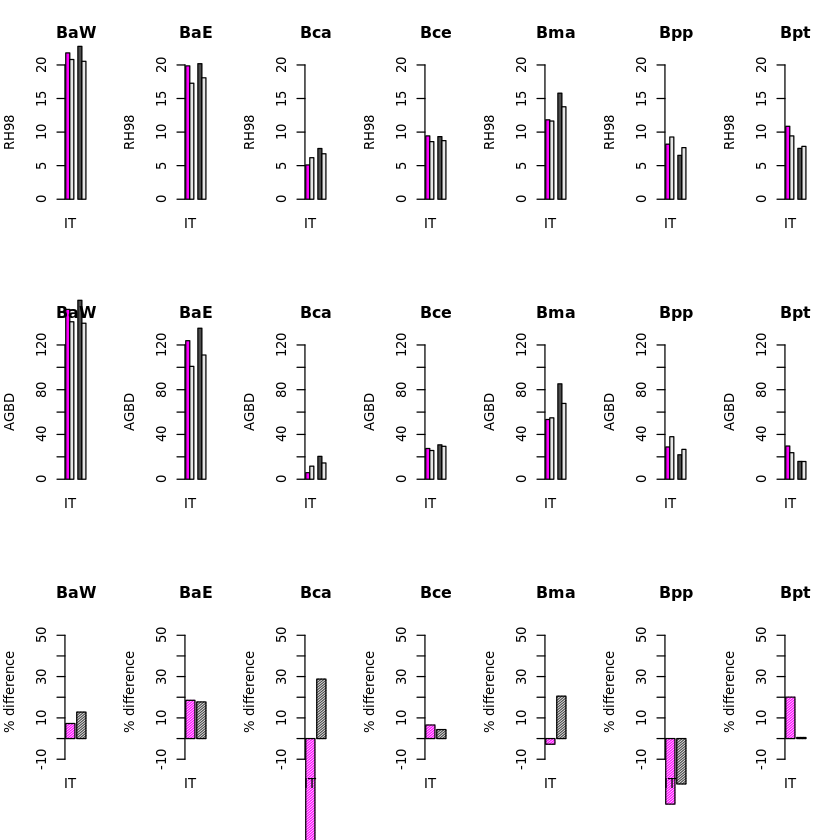

In [281]:
#names(BIOMES_summary) <- as.vector(biome_names)
names(BIOMES_summary) <- c("BaW","BaE","Bca","Bce","Bma","Bpp","Bpt")
#BIOMES_summary

#par(mfrow=c(2,3))
par(mfrow=c(3,7))
for(i in 1:7){ barplot(BIOMES_summary[[i]][c("rh1","rh0"),], beside=T, ylim=c(0,20),
                                  ylab="RH98", main=paste(names(BIOMES_summary)[[i]]),
                                  col=c("magenta","gray90","gray30","gray90"))}

for(i in 1:7){ barplot(BIOMES_summary[[i]][c("agbd1","agbd0"),], beside=T, ylim=c(0,120),
                                  ylab="AGBD", main=paste(names(BIOMES_summary)[[i]]),
                                  col=c("magenta","gray90","gray30","gray90"))}
##
for(i in 1:7){ barplot(100*BIOMES_summary[[i]][c("absdiff"),]/BIOMES_summary[[i]][c("agbd1"),], beside=T, ylim=c(-10,55),
                                  ylab="% difference", main=paste(names(BIOMES_summary)[[i]]),
                                  col=c("magenta","gray30"), density=75)}



In [ ]:
#names(BIOMES_summary) <- as.vector(biome_names)
names(BIOMES_summary) <- c("BaW","BaE","Bca","Bce","Bma","Bpp","Bpt")
#BIOMES_summary

#par(mfrow=c(3,7))
par(mfrow=c(1,1))
for(i in 1:7){ barplot(BIOMES_summary[[i]][c("rh1","rh0"),], beside=T, ylim=c(0,20),
                                  ylab="RH98", main=paste(names(BIOMES_summary)[[i]]),
                                  col=c("magenta","gray90","gray30","gray90"))}

for(i in 1:7){ barplot(BIOMES_summary[[i]][c("agbd1","agbd0"),], beside=T, ylim=c(0,120),
                                  ylab="AGBD", main=paste(names(BIOMES_summary)[[i]]),
                                  col=c("magenta","gray90","gray30","gray90"))}
##
for(i in 1:7){ barplot(100*BIOMES_summary[[i]][c("absdiff"),]/BIOMES_summary[[i]][c("agbd1"),], beside=T, ylim=c(-10,55),
                                  ylab="% difference", main=paste(names(BIOMES_summary)[[i]]),
                                  col=c("magenta","gray30"), density=75)}



In [248]:
colnames(pa_stats_BRA_merg)

[1] "WDPAID"      "pa_id"       "count_0"     "count_1"     "meanrh98_0" 
 [6] "meanrh98_1"  "sdrh98_0"    "sdrh98_1"    "meanagbd_0"  "meanagbd_1" 
[11] "sdagbd_0"    "sdagbd_1"    "wwfbiom_0"   "wwfbiom_1"   "wwfecoreg_0"
[16] "wwfecoreg_1" "REGION_0"    "REGION_1"    "PFT_0"       "PFT_1"      
[21] "iso3"        "bbiom"       "rh98_difA"   "rh98_difP"   "agbd_difA"  
[26] "agbd_difP"   "X"           "WDPA_PID"    "PA_DEF"      "NAME"       
[31] "ORIG_NAME"   "DESIG"       "DESIG_ENG"   "DESIG_TYPE"  "IUCN_CAT"   
[36] "INT_CRIT"    "MARINE"      "REP_M_AREA"  "GIS_M_AREA"  "REP_AREA"   
[41] "GIS_AREA"    "NO_TAKE"     "NO_TK_AREA"  "STATUS"      "STATUS_YR"  
[46] "GOV_TYPE"    "OWN_TYPE"    "MANG_AUTH"   "MANG_PLAN"   "VERIF"      
[51] "METADATAID"  "SUB_LOC"     "PARENT_ISO"  "ISO3"

In [256]:
sort(unique(pa_stats_BRA_merg[,"wwfbiom_1"]))

[1] "Deserts & Xeric Shrublands"                              
[2] "Flooded Grasslands & Savannas"                           
[3] "Mangroves"                                               
[4] "Tropical & Subtropical Dry Broadleaf Forests"            
[5] "Tropical & Subtropical Grasslands, Savannas & Shrublands"
[6] "Tropical & Subtropical Moist Broadleaf Forests"

In [275]:
##
biome_summary <- matrix(0, nrow=7, ncol=2)
#colnames(biome_summary) <- c("INDIGENOUS", "OTHER")
colnames(biome_summary) <- c("IT", "PA")
row.names(biome_summary) <- c("rh0","agbd0","rh1","agbd1","absdiff","percdiff","numPAs")
biome_summary
##
#biome_names <- c("Amazônia West","Amazônia East","Caatinga","Cerrado","Mata Atlântica","Pampa","Pantanal")
#biome_ids <- c("BaW","BaE","Bca","Bce","Bma","Bpp","Bpt")
biome_names <- sort(unique(pa_stats_BRA_merg[,"wwfbiom_1"]))
biome_ids <- c("DXS","FGS","M","TSDBF","TSGSS","TSMBF")

##
BIOMES_summary <- vector(mode="list", length=length(biome_ids))


,IT,PA
rh0,0,0
agbd0,0,0
rh1,0,0
agbd1,0,0
absdiff,0,0
percdiff,0,0
numPAs,0,0


In [276]:
for(i in 1:length(biome_ids)){
  print(biome_names[i])
  
  BIOMES_summary[[i]] <- biome_summary
  
  biome1 <- pa_stats_BRA_merg[pa_stats_BRA_merg$wwfbiom_1 == biome_names[i],]
  biome1_indig <- biome1[biome1[,"DESIG_ENG"]=="Indigenous Area" | biome1[,"DESIG_ENG"]=="Indigenous Reserve",]
  biome1_other <- biome1[biome1[,"DESIG_ENG"]!="Indigenous Area" & biome1[,"DESIG_ENG"]!="Indigenous Reserve",]
  
  BIOMES_summary[[i]]["rh0",1] <- mean(biome1_indig[,"meanrh98_0"])
  BIOMES_summary[[i]]["rh1",1] <- mean(biome1_indig[,"meanrh98_1"])
  BIOMES_summary[[i]]["rh0",2] <- mean(biome1_other[,"meanrh98_0"])
  BIOMES_summary[[i]]["rh1",2] <- mean(biome1_other[,"meanrh98_1"])
    
  BIOMES_summary[[i]]["agbd0",1] <- mean(biome1_indig[,"meanagbd_0"])
  BIOMES_summary[[i]]["agbd1",1] <- mean(biome1_indig[,"meanagbd_1"])
  BIOMES_summary[[i]]["agbd0",2] <- mean(biome1_other[,"meanagbd_0"])
  BIOMES_summary[[i]]["agbd1",2] <- mean(biome1_other[,"meanagbd_1"])
  
  BIOMES_summary[[i]]["absdiff",1] <- mean(biome1_indig[,"agbd_difA"], na.rm=T)
  BIOMES_summary[[i]]["absdiff",2] <- mean(biome1_other[,"agbd_difA"], na.rm=T)
  BIOMES_summary[[i]]["percdiff",1] <- mean(biome1_indig[,"agbd_difP"], na.rm=T)
  BIOMES_summary[[i]]["percdiff",2] <- mean(biome1_other[,"agbd_difP"], na.rm=T)
  
  BIOMES_summary[[i]]["numPAs",1] <- nrow(biome1_indig)
  BIOMES_summary[[i]]["numPAs",2] <- nrow(biome1_other)
}



[1] "Deserts & Xeric Shrublands"
[1] "Flooded Grasslands & Savannas"
[1] "Mangroves"
[1] "Tropical & Subtropical Dry Broadleaf Forests"
[1] "Tropical & Subtropical Grasslands, Savannas & Shrublands"
[1] "Tropical & Subtropical Moist Broadleaf Forests"


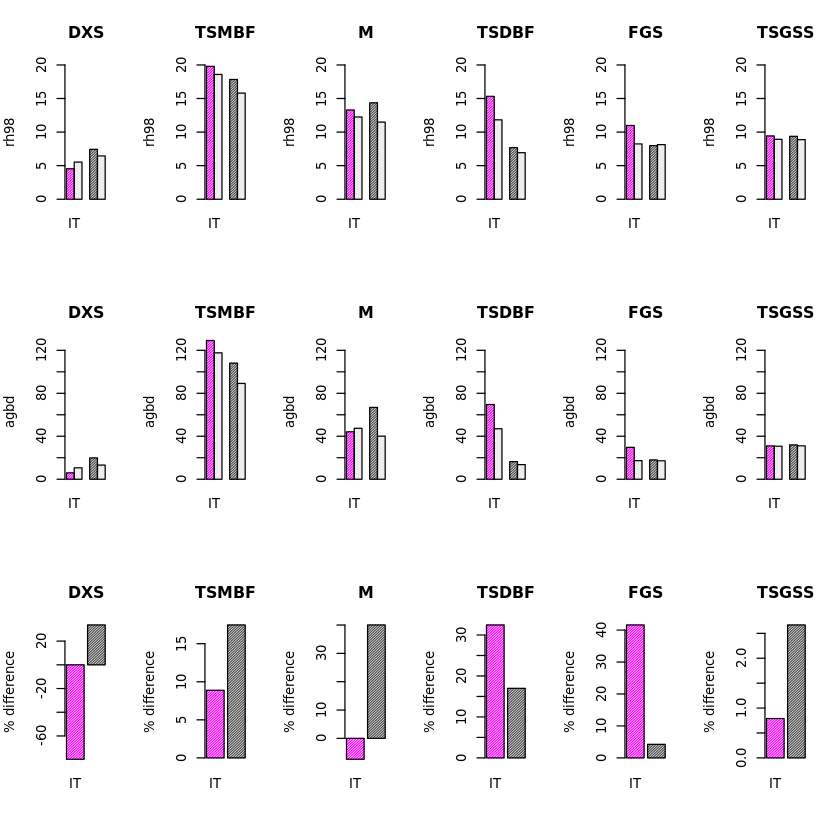

In [279]:
names(BIOMES_summary) <- as.vector(biome_ids)
#BIOMES_summary

par(mfrow=c(3,6))
for(i in c(1,6,3,4,2,5)){ barplot(BIOMES_summary[[i]][c("rh1","rh0"),], beside=T, ylim=c(0,20),
                                  ylab="rh98", main=paste(names(BIOMES_summary)[[i]]),
                                  col=c("magenta","gray90","gray30","gray90"), density=75)}

for(i in c(1,6,3,4,2,5)){ barplot(BIOMES_summary[[i]][c("agbd1","agbd0"),], beside=T, ylim=c(0,125),
                                  ylab="agbd", main=paste(names(BIOMES_summary)[[i]]),
                                  col=c("magenta","gray90","gray30","gray90"), density=75)}

for(i in c(1,6,3,4,2,5)){ barplot(100*BIOMES_summary[[i]][c("absdiff"),]/BIOMES_summary[[i]][c("agbd1"),], beside=T,
                                  ylab="% difference", main=paste(names(BIOMES_summary)[[i]]),
                                  col=c("magenta","gray30"), density=75)}
